# Explorative Datenanalyse
---



- Beschreibende Statistik
- Visualisierung
- ...

Eine explorative Datenanalyse ermöglicht ein freies/ flexibles Kennenlernen der Daten. Dabei gibt es nicht den einen Weg, sondern eine Vielzahl von Möglichkeiten und Ansätzen. Daher hier ein kleiner Leitfaden.

Bitte Beachtet:  
Eine Explorative Datenanalyse ist nie wirklich abgeschlossen. Die Ergebnisse aus der EDA werden für den Bau von Modellen verwendet. Die Modellergebnisse werden wieder mit einer EDA untersucht.

Wer Lust und Zeit hat, kann gerne tiefer in die Materie eintauchen. Beide Bücher sind gratis abrufbar.

Literatur: 

Python:  
https://jakevdp.github.io/PythonDataScienceHandbook/index.html

R:  
https://r4ds.had.co.nz


# Worum geht es heute?

![houses](Pictures/houses.png)

- Fragestellung: Von welchen Einflussfaktoren werden Hauspreise bestimmt?
- Daten: Eine Sammlung von Häusern aus King County (Seattle)

# Laden der benötigten Packages

Warum: Python ist eine allgemeine Programmiersprache. Die Community entwickelt stetig neue 'Packages', welche den Funktionsumfang von Python erweitern und das Anwenden von komplizierten Verfahren vereinfachen. Wir machen quasi den Werkzeugkoffer auf und holen uns die Erweiterungen heraus, die wir für unsere Analyse benötigen.

In [144]:
# Für das Handling von Tabellen
import pandas as pd

# Zum rechnen
import numpy as np
import scipy.stats as stats

# Visualisierung
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Preprocessing, machine learning
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Wir wollen keine Warnungen sehen
import warnings
warnings.filterwarnings("ignore")

# Importieren der Daten

Die Daten können unter folgendem Link heruntergeladen werden:  
https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv

Ein paar Anregungen:  
https://www.kaggle.com/harlfoxem/house-price-prediction-part-1  
https://www.kaggle.com/burhanykiyakoglu/predicting-house-prices 

Zum Laden der Daten nutzen wir die Pandas Funktion pd.read_csv()

In [145]:
df = pd.read_csv('Data/kc_house_data_na.csv')

Wieviele Zeilen und Spalten sind in dem Dataframe?  
(Zeilen, Spalten)

In [146]:
df.shape

(21613, 21)

Statistische Lagemaße

In [147]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,8487.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,742.357134,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,405.111631,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,10.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,450.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,700.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,980.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Erster Blick auf Datentypen und Missing Values

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  8487 non-null   float64
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Der erste Blick auf die Daten

Die Methode .head() zeigt die obersten Spalten eines Dataframes an. Analog dazu kann die Methode .tail() genutzt werden um die letzten Spalten anzeigen zu lassen

In [149]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,NaN,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,NaN,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,NaN,1987,0,98074,47.6168,-122.045,1800,7503


Die Spalte 'id' wird für unsere Analyse nicht benötigt. Mit der .drop() Methode können Spalten oder Zeilen entfernt werden.

In [150]:
# Axis 1 = Columns
# Axis 0 = Rows
df = df.drop(labels='id', axis=1)

In [151]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,NaN,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,NaN,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,NaN,1987,0,98074,47.6168,-122.045,1800,7503


Was machen wir mit der 'date' Spalte? Irgendwie sieht die komisch aus...  
Mit Hilfe der Pandas funktion pd.to_datetime() lassen sich Spalten in Zeitstempel 'übersetzen'.

In [152]:
df['date'] = pd.to_datetime(df['date'])

In [153]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,NaN,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,NaN,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,NaN,1987,0,98074,47.6168,-122.045,1800,7503


Die Spalte 'date' ist für uns zwar nicht relevant, aber man kann einiges mit 'datetime objects' anfangen.

In [154]:
df['date'].dt.year

0        2014
1        2014
2        2015
3        2014
4        2015
         ... 
21608    2014
21609    2015
21610    2014
21611    2015
21612    2014
Name: date, Length: 21613, dtype: int64

Wir lassen die Spalte trotzdem außen vor

In [155]:
df = df.drop(labels='date', axis=1)

# Data Cleaning?

## NA Werte/ Missing Values

Mit df.isnull() lässt sich für jeden Wert in dem Dataframe anzeigen, ob er ein missing value ist.  
Ergänzt man df.isnull() um .sum() so wird für jede Spalte die Summe aller enthaltenen missing values angezeigt.

In [156]:
df.isnull().sum()

price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                 0
condition            0
grade                0
sqft_above           0
sqft_basement    13126
yr_built             0
yr_renovated         0
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
dtype: int64

Die Spalte 'sqft_basement' enthält 13.126 missing values. Wie gehen wir damit um?
- Wahrscheinlich bedeuten die Missing Values, dass das betreffende Haus keinen Keller hat.
- Wir sollten die missing values in die Zahl 0 umwandeln!

Das geht am besten mit der .fillna() Methode

In [157]:
df = df.fillna(value=0)

# Zielvariable - Price

Bevor wir richtig in die Analyse starten, sollten wir uns ein Bild von der Zielvariable machen. Dafür schauen wir uns zunächst die Verteilung und Lagemaße an.  

Lasst uns die Verteilung visualisieren. Dafür nutzen wir das Seaborn Package (sns).

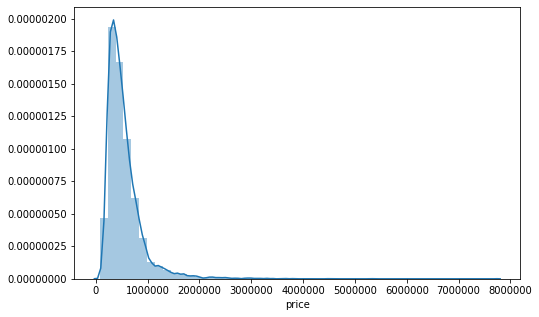

In [158]:
# Einstellungen: Wie groß soll die Grafik sein?
plt.figure(figsize=(8,5))

# sns.distplot erstellt eine Verteilungsfunktion
sns.distplot(df['price'])

Was sehen wir?:  
- Die Verteilung ist rechtsschief
- Es gibt einige wenige Außreißer (siehe X Achse > 1,5 Mio)

Sollten wir das arithmetische Mittel oder den Median verwenden um die Verteilung zu beschreiben?

In [159]:
# .describe() funktioniert auch mit einzelnen Spalten
df[['price']].describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0,321950.0,450000.0,645000.0,7700000.0


Das arithmetische Mittel lässt sich von den Ausreißern beeinflussen und ist daher höher als der Median. Wir entscheiden uns daher für den Median.

Lasst uns noch einen Blick auf zwei weitere Metriken werfen, die uns helfen die Form der Verteilung einzuordnen:
1. Skewness: Misst die Asymmetrie in einer Verteilung (0 = Symmetrisch, <0 = linksschief, >0 = rechtsschief)
2. Kurtosis: Misst die Wölbung/ 'Spitzigkeit' einer Verteilung (0 = normal, <0 = flach, >0 = steil/ spitz

In [160]:
print('Skewness: ' + str(df['price'].skew()))
print('Kurtosis: ' + str(df['price'].kurt()))

Skewness: 4.024069144684712
Kurtosis: 34.58554043194243


In [161]:
np.log(df[['price']]).describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,13.047817,0.526685,11.225243,12.682152,13.017003,13.377006,15.856731


In [162]:
print('Skewness: ' + str(np.log(df[['price']]).skew()))
print('Kurtosis: ' + str(np.log(df[['price']]).kurt()))

Skewness: price    0.428072
dtype: float64
Kurtosis: price    0.691854
dtype: float64


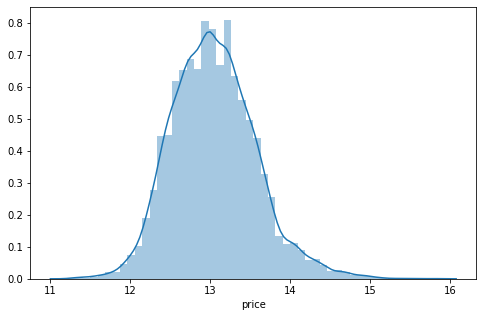

In [163]:
# Einstellungen: Wie groß soll die Grafik sein?
plt.figure(figsize=(8,5))

# sns.distplot erstellt eine Verteilungsfunktion
sns.distplot(np.log(df['price']))

# Oh cool, wir haben geografische Informationen

...Lasst sie uns nutzen

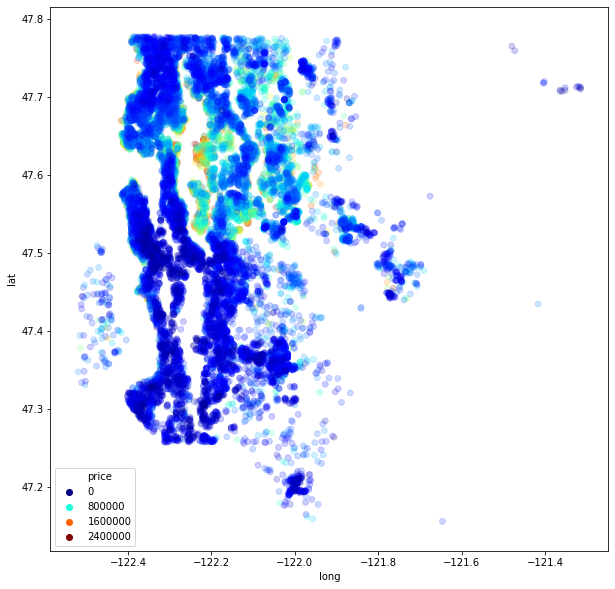

In [207]:
# Wieviele zeilen wollen wir auswählen?
top_one = round(df.shape[0]*0.01)

# Auswahl der genannten Zeilenanzahl nachdem der Dataframe nach 'price' sortiert wurde
df_top_one = df.sort_values('price',ascending=False).iloc[top_one:]

# Einstellungen: Wie groß soll die Grafik sein?
plt.figure(figsize=(10,10))

# sns.scatterplot erstellt eine Punktwolke
sns.scatterplot(
    x=df_top_one['long'], # Welche Variable soll auf der X-Achse stehen?
    y=df_top_one['lat'], # Welche Variable soll auf der Y-Achse stehen?
    hue=df_top_one['price'], # Nach welcher Variable sollen die Punkte eingefärbt werden?
    #sizes=(50,300),
    #palette='RdYlGn',
    #palette='Spectral',
    #palette='coolwarm',
    #palette='Greens',
    palette=plt.get_cmap('jet'), # Welche Farben sollen zum Einsatz kommen?
    alpha=0.2, # wie durchsichtig sollen die Punkte sein?
    legend='brief',
    edgecolor=None
)

plt.show()

Das bekommen wir bestimmt auch etwas schöner hin. Lasst uns eine richtige Landkarte erstellen.

In [165]:
# Erstellen einer Kopie von df
df_ = df.copy()

# Auswahl der genannten Zeilenanzahl nachdem der Dataframe nach 'price' sortiert wurde
df_top_one_ = df_.sort_values('price',ascending=False).iloc[top_one:]

# Damit die Unterschiede besser sichtbar sind, skalieren wir 'price'
minmaxscaler = MinMaxScaler()
df_top_one_['price_weighted'] = minmaxscaler.fit_transform(df_top_one_[['price']])

In [166]:
# Erstellen einer Karte mit dem Median von 'lat' und 'long'
kc_map = folium.Map(
    location=[df['lat'].median(),df['long'].median()],
    zoom_start=10,
    control_scale=False
)

# Hinzufügen einer weiteren Ebene
folium.TileLayer('cartodbpositron').add_to(kc_map)

# Erstellen der Heatmap
HeatMap(
    data=df_top_one_[['lat', 'long', 'price_weighted']],
    radius=3,
    blur=0.5,min_opacity=0.1,max_zoom=11,
    name='HeatMap',
    show=False
).add_to(kc_map)

# Hinzufügen des Kontrollkästchens
folium.LayerControl(collapsed=False).add_to(kc_map)

# Anzeigen der Karte
kc_map

Offensichtlich hat der Preis der Häuser etwas mit der Lage zu tun. Lasst uns die Variablen 'waterfront', 'view' und 'zipcode' anschauen.

## Waterfront

Für den Vergleich von Verteilungen über verschiedene Gruppen hinweg, bietet sich ein Boxplot an

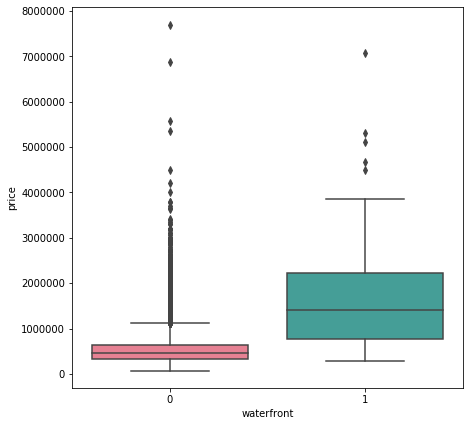

In [167]:
# Einstellungen: Wie groß soll die Grafik sein?
plt.figure(figsize=(7,7))

# Erstellen eines Boxplots
sns.boxplot(
    x=df['waterfront'], # X-Achse
    y=df['price'], # Y-Achse
    palette='husl' # Welche Farben?
)


Immobilien am Wasser sind grundsätzlich mehr wert. Es gibt jedoch viele Ausreißer für die das nicht gilt.

## View

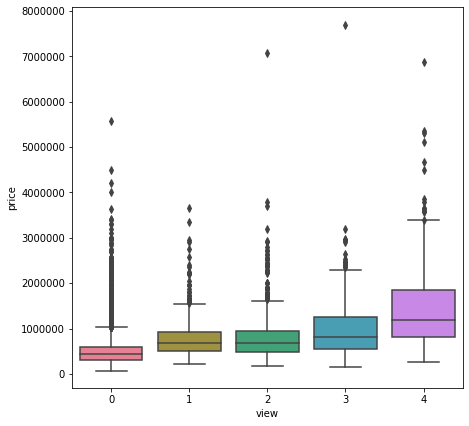

In [168]:
plt.figure(figsize=(7,7))

sns.boxplot(
    x=df['view'],
    y=df['price'],
    palette='husl'
)

Häuser mit einer schönen Aussicht sind mehr wert

## Zipcode

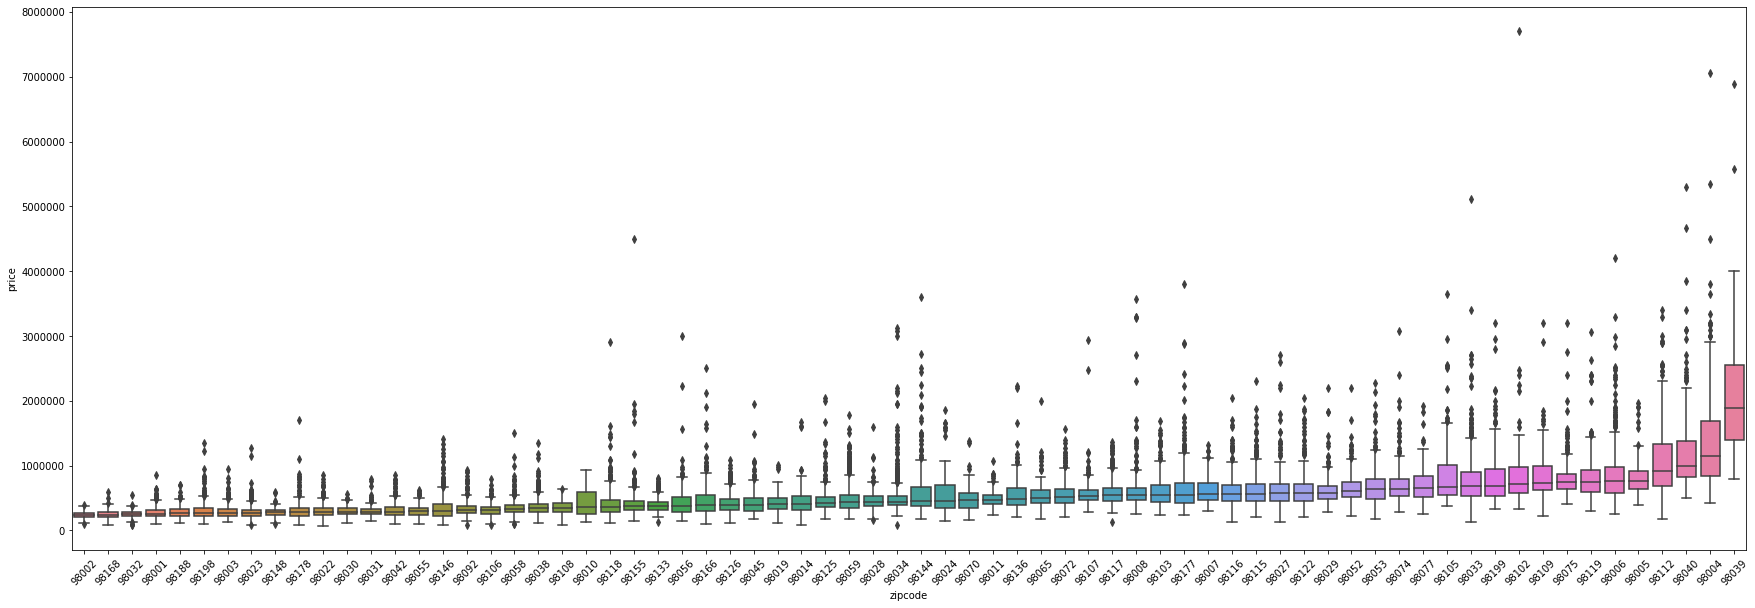

In [169]:
plt.figure(figsize=(30,10))

sns.boxplot(
    x=df['zipcode'],
    y=df['price'],
    palette='husl',
    # Mit 'order' lässt sich der Boxplot in eine bestimmte Reihenfolge bringen
    order=df[['zipcode', 'price']].groupby(by='zipcode').agg(np.median).sort_values(by='price').index
)

plt.xticks(rotation=45);

Es bestehen preisliche Unterschiede zwischen den verschiedenen Vierteln (PLZ). Insbesondere stechen 4 Postleitzahlen heraus. Lasst uns das genauer ansehen. Dafür erstellen wir einen neuen Dataframe mit einer Auswahl an Variablen.

In [170]:
# Wie soll aggregiert werden?
agg_args = {'price' : np.median, 
            'zipcode' : 'count', 
            'waterfront': np.mean, 
            'grade' : np.mean, 
            'lat': np.median, 
            'long': np.median
           }

In [171]:
# Auswahl eines Subsets
# Gruppieren nach 'zipcode'
# Wie sollen die anderen Spalten jeweils aggregiert werden?
df_zipcode = df[['zipcode', 'price', 'waterfront', 'grade', 'lat', 'long']].\
    groupby(by='zipcode', as_index=True).\
    aggregate(agg_args)

# Umbenennen der Spalten in sprechendere Namen
df_zipcode.columns = ['price_median', 'count', 'waterfront_mean', 'grade_mean','lat', 'long']

# Lasst uns einen Blick auf den Dataframe werfen
df_zipcode.sort_values(by='price_median',ascending=False).iloc[:,:4]

,price_median,count,waterfront_mean,grade_mean
zipcode,,,,
98039,1892500.0,50,0.020000,9.560000
98004,1150000.0,317,0.003155,8.687697
98040,993750.0,282,0.042553,8.960993
98112,915000.0,269,0.000000,8.442379
98005,765475.0,168,0.000000,8.488095
...,...,...,...,...
98188,264000.0,136,0.000000,7.036765
98001,260000.0,362,0.000000,7.295580
98032,249000.0,125,0.000000,7.144000


## Abschluss 'Lage'

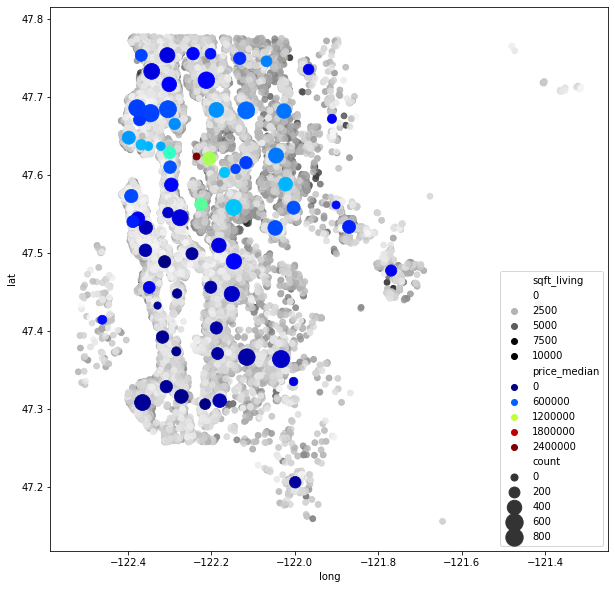

In [172]:
plt.figure(figsize=(10,10))

sns.scatterplot(
    x=df_top_one['long'],
    y=df_top_one['lat'],
    hue=df_top_one['sqft_living'],
    #palette='RdYlGn',
    #palette='Spectral',
    #palette='coolwarm',
    #palette='Greens',
    palette='gray_r',
    #palette=plt.get_cmap('jet'),
    alpha=0.8,
    legend='brief',
    edgecolor=None
    )

sns.scatterplot(
    x=df_zipcode['long'],
    y=df_zipcode['lat'],
    hue=df_zipcode['price_median'],
    size=df_zipcode['count'],
    #palette='RdYlGn',
    #palette='Spectral',
    #palette='coolwarm',
    #palette='Greens',
    palette=plt.get_cmap('jet'),
    legend='brief',
    edgecolor=None, 
    sizes=(50,300)
    )

plt.legend()
plt.show()

Notizen:
- Die höchsten Hauspreise finden sich in der Innenstadt von Seattle 
- Die gilt insbesondere für die Küsten östlich des Lake Washington
- Die Variablen 'waterfront' und 'view' erklären einen Teil der Hauspreise
- Es gibt 4 hochpreisige Viertel rund um den Lake Washington
- Das Viertel mit dem höchsten Medianpreis hat gleichzeitig eine relativ niedrige Anzahl an Häusern
- Die Häuser mit den größten Quadratmetern liegen eher außerhalb des Zentrums

Was beeinflusst wahrscheinlich noch Hauspreise???

# Größe, Alter, Qualität und Ausstattung

## Größe

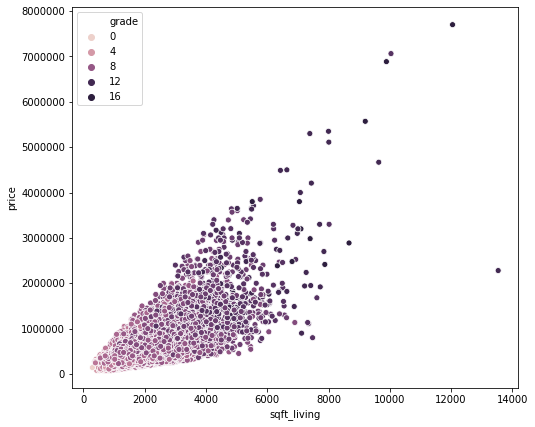

In [173]:
plt.figure(figsize=(8,7))
sns.scatterplot(x=df['sqft_living'],y=df['price'], hue=df['grade'])

## Alter

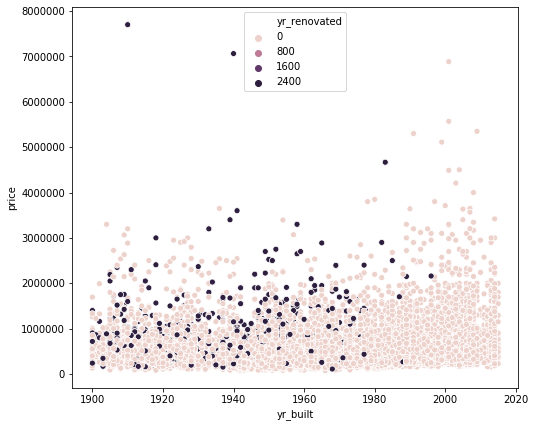

In [174]:
plt.figure(figsize=(8,7))
sns.scatterplot(x=df['yr_built'],y=df['price'], hue=df['yr_renovated'])

## Qualität

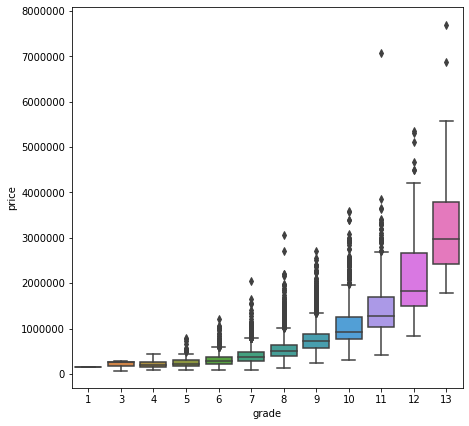

In [175]:
plt.figure(figsize=(7,7))
sns.boxplot(x=df['grade'],
            y=df['price'],
            palette='husl'
)

## Ausstattung

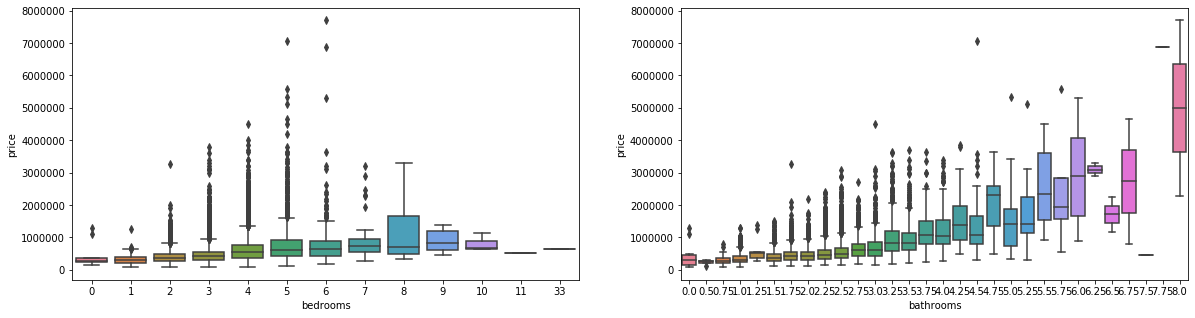

In [176]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

sns.boxplot(x=df['bedrooms'],
            y=df['price'],
            palette='husl',ax=ax[0]
)

sns.boxplot(x=df['bathrooms'],
            y=df['price'],
            palette='husl',ax=ax[1]
)

- Die Anzahl der Schlafzimmer scheint nur einen geringen positiven Einfluss auf den Preis zu haben
- Bei der Anzahl der Badezimmer lässt sich ein deutlicher positiver Einfluss feststellen

# Wie machen wir jetzt weiter?

Wir orientieren uns anhand von Korrelationskoeffizienten

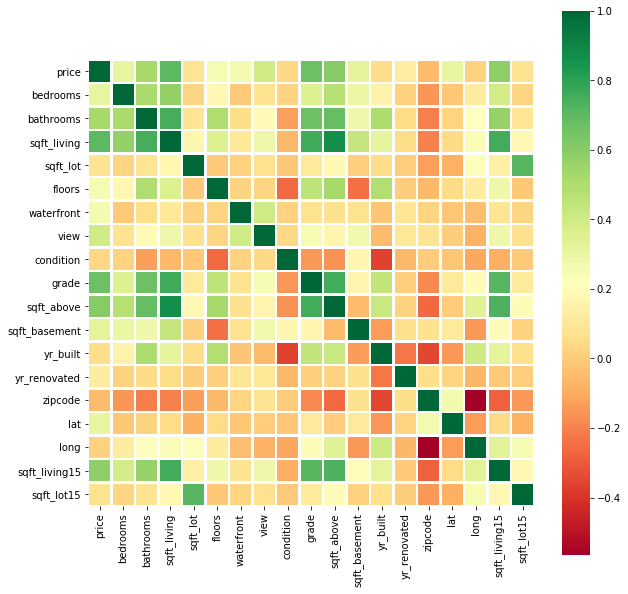

In [177]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),square=True, cmap="RdYlGn", linewidths=1.5 ,linecolor="white")

Was sind die Variablen mit der höchsten Korrelation zu 'price'?

Lasst uns eine entsprechende Liste erstellen. Neben der 'Lage' werden wir uns auf die vier Variablen mit den höchsten Korrelationen konzentrieren. Allerdings sollten wir vorher überprüfen, ob die Varibablen nicht untereinander so korreliert sind, dass sie das Gleiche aussagen.

Lasst uns eine Liste erstellen aus der man sieht welche Variablen in welcher Höhe mit 'price' korreliert sind.

In [178]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

Das kriegen wir auch etwas schöner hin.

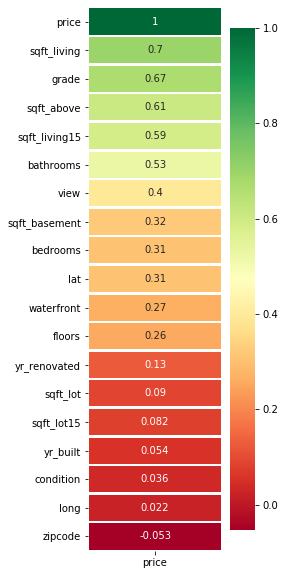

In [179]:
plt.figure(figsize=(3,10))
sns.heatmap(data=df.corr()[['price']].sort_values(by='price',ascending=False),
            square=False, 
            cmap="RdYlGn",
            linewidths=1.5,
            linecolor="white",annot=True)

Lasst uns 'sqft_living', 'sqft_above' und 'sqft_living15' vergleichen. Gibt es Überschneidungen?

In [180]:
df[['sqft_living','sqft_above']].corr()

,sqft_living,sqft_above
sqft_living,1.000000,0.876597
sqft_above,0.876597,1.000000


Die Variablen 'sqft_living' und 'sqft_above' sind relativ stark korreliert untereinander. Es bietet sich daher an nur 'sqft_living' weiter zu betrachten.  

Wir betrachten daher die folgenden Variablen:
1. 'sqft_living'
2. 'grade'
3. 'sqft_living15'
4. 'bathrooms'

# Analyse unserer Auswahl

In [181]:
# Wir speichern die Auswahl in einer Liste ab
selection = ['sqft_living', 'grade', 'sqft_living15', 'bathrooms', 'price']

## Einzelbetrachtung

### sqft_living

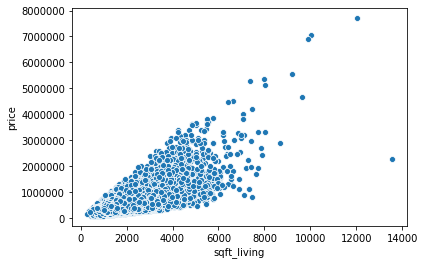

In [182]:
sns.scatterplot(x=df['sqft_living'], y=df['price'])

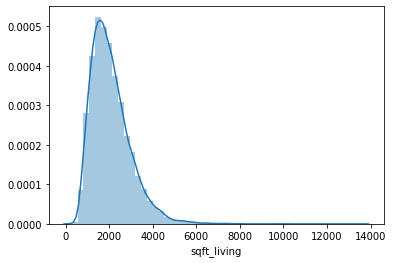

In [183]:
sns.distplot(df['sqft_living'])

In [184]:
df[['sqft_living']].describe().T

,count,mean,std,min,25%,50%,75%,max
sqft_living,21613.0,2079.899736,918.440897,290.0,1427.0,1910.0,2550.0,13540.0


In [185]:
print('Skewness: ' + str(df['sqft_living'].skew()))
print('Kurtosis: ' + str(df['sqft_living'].kurt()))

Skewness: 1.471555426802092
Kurtosis: 5.24309298981711


### grade

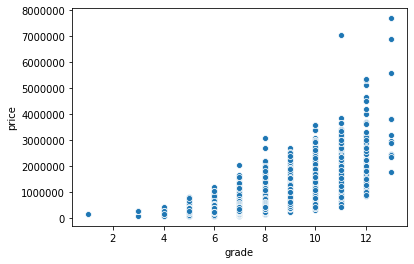

In [186]:
sns.scatterplot(x=df['grade'], y=df['price'])

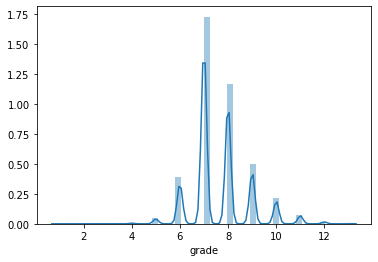

In [187]:
sns.distplot(df['grade'])

### sqft_living15

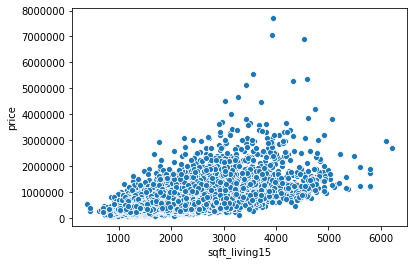

In [188]:
sns.scatterplot(x=df['sqft_living15'], y=df['price'])

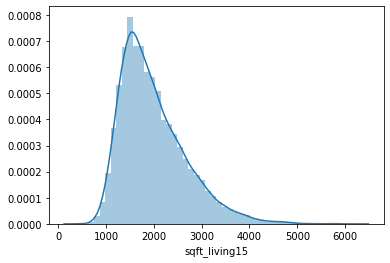

In [189]:
sns.distplot(df['sqft_living15'])

In [190]:
df[['sqft_living15']].describe().T

,count,mean,std,min,25%,50%,75%,max
sqft_living15,21613.0,1986.552492,685.391304,399.0,1490.0,1840.0,2360.0,6210.0


In [191]:
print('Skewness: ' + str(df['sqft_living15'].skew()))
print('Kurtosis: ' + str(df['sqft_living15'].kurt()))

Skewness: 1.1081812758966967
Kurtosis: 1.5970958104616884


### bathrooms

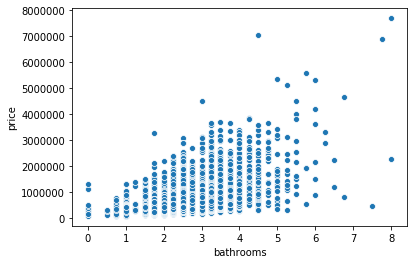

In [192]:
sns.scatterplot(x=df['bathrooms'], y=df['price'])

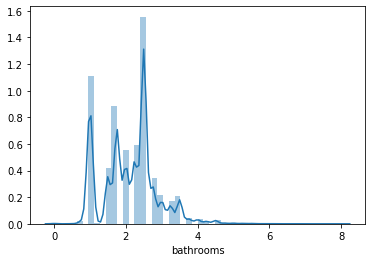

In [193]:
sns.distplot(df['bathrooms'])

In [194]:
df[['bathrooms']].describe().T

,count,mean,std,min,25%,50%,75%,max
bathrooms,21613.0,2.114757,0.770163,0.0,1.75,2.25,2.5,8.0


In [195]:
print('Skewness: ' + str(df['bathrooms'].skew()))
print('Kurtosis: ' + str(df['bathrooms'].kurt()))

Skewness: 0.5111075733474171
Kurtosis: 1.2799024441754554


OverflowError: cannot convert float infinity to integer

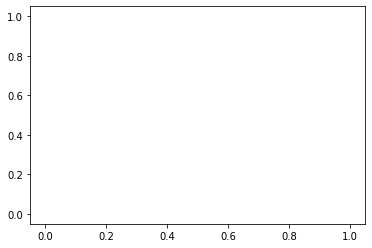

In [208]:
sns.distplot(np.log(df['bathrooms']))

Oh je, ein Fehler...

Es gibt tatsächlich Häuser ohne Badezimmer (Wer kauft so etwas???). Spaß beiseite: Der Fehler tritt auf, weil kein Logarithmus für 0 existiert. Python zeigt in solchen Fällen ein inf (für infinity) an. Lasst uns das untersuchen.

In [209]:
np.isinf(np.log(df['bathrooms'])).value_counts()

False    21603
True        10
Name: bathrooms, dtype: int64

Tatsächlich: 10 inf Werte  

Wie können wir 'bathrooms' trotzdem transformieren???  

Mit dem Powertransformer!!!

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html

In [211]:
type(df['bathrooms'])

pandas.core.series.Series

In [212]:
transformer = PowerTransformer(method='yeo-johnson')
pd.DataFrame(transformer.fit_transform(df[['bathrooms']]))

,0
0,-1.571853
1,0.250882
2,-1.571853
3,1.136536
4,-0.072697
...,...
21608,0.559169
21609,0.559169
21610,-2.018163
21611,0.559169


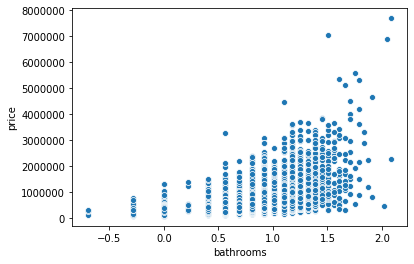

In [210]:
sns.scatterplot(x=np.log(df['bathrooms']), y=df['price'])

## Gemeinsame Betrachtung

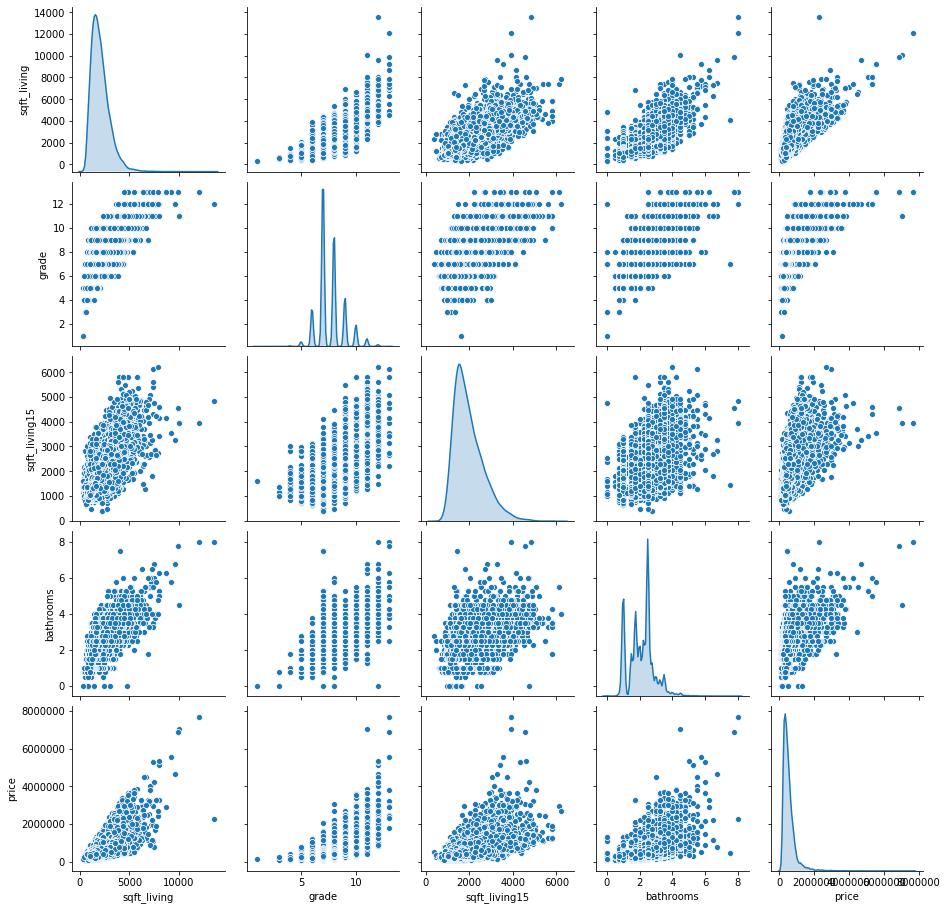

In [196]:
sns.pairplot(
    df[selection],
    diag_kind='kde'
)

# Feature Engineering

Feature Engineering beschreibt das Erstellen neuer Variablen aus den bestehenden.  

Lasst uns zwei Variablen kombinieren:

In [213]:
df['bath_per_bed'] = df['bathrooms'] / (df['bedrooms'] + 0.0001)

Zusätzlich wollen wir die Verteilung von 'price' etwas symmetrischer hinbekommen:

In [214]:
df['price_log'] = np.log(df['price'])

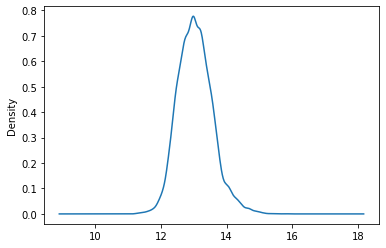

In [215]:
df['price_log'].plot(kind='kde')

# Train Test Split

In [216]:
#X = df[selection].drop(labels='price',axis=1)
#X = df[['sqft_living','view', 'grade']]
X = df.drop(labels=['price', 'price_log', 'lat', 'long'],axis=1)
y = df['price']

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Model

In [218]:
tree = DecisionTreeRegressor()

In [219]:
tree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [220]:
tree_pred = tree.predict(X_test)

In [221]:
mean_squared_error(y_test,tree_pred)**0.5

243760.9402840126

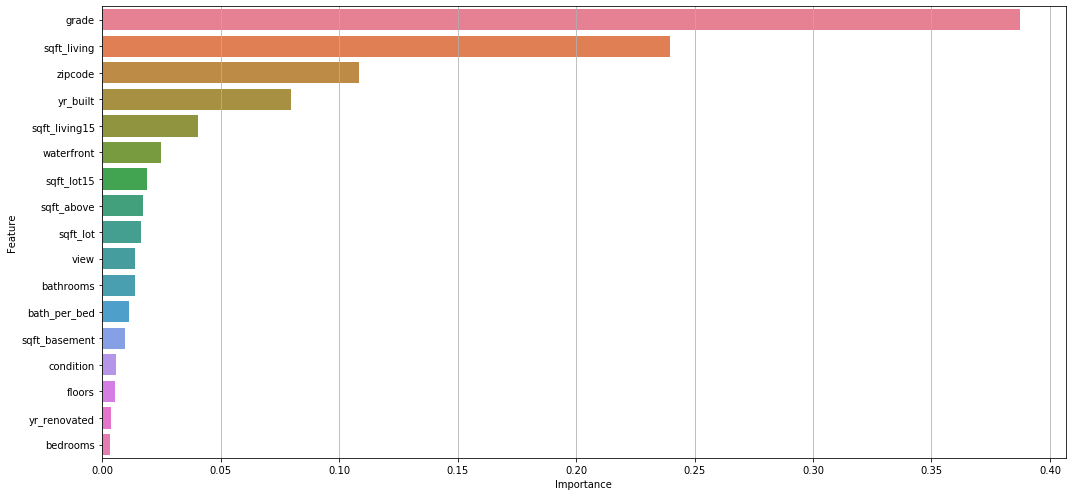

In [222]:
feature_importance = pd.DataFrame(
    sorted(zip(tree.feature_importances_,X_train)),
    columns=['Importance', 'Feature']).sort_values(by='Importance', ascending=False)

feature_importance_0 = feature_importance.loc[feature_importance.Importance == 0,'Feature'].to_list()
feature_importance = feature_importance.loc[feature_importance.Importance > 0,:]

plt.figure(figsize=(15, 7))
plt.grid()
sns.barplot(x=feature_importance['Importance'], y=feature_importance['Feature'], palette='husl')
plt.tight_layout()
